# MNIST数据集

## 1. 加载数据集

In [1]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


## 2. 数据探索

In [2]:
import matplotlib.pyplot as plt

def plot_figure(im, interp = False):    # 线性插值
    f = plt.figure(figsize = (3, 6))
    plt.gray()
    plt.imshow(im, interpolation = None if interp else 'none')

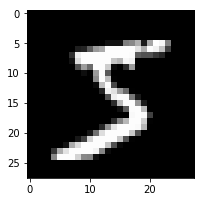

In [3]:
plot_figure(train_images[0])

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

In [9]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

## 3. 数据预处理

### 3.1 数据标准化(Normalization)

In [10]:
train_images_dense = train_images.reshape((60000, 28 * 28))
train_images_dense = train_images_dense.astype('float32') / 255

test_images_dense = test_images.reshape((10000, 28 * 28))
test_images_dense = test_images_dense.astype('float32') / 255

In [11]:
train_images_conv = train_images.reshape((60000, 28, 28, 1))
train_images_conv = train_images_conv.astype('float32') / 255

test_images_conv = test_images.reshape((10000, 28, 28, 1))
test_images_conv = test_images_conv.astype('float32') / 255

### 3.2 one-hot encoding

In [12]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [13]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
print(train_labels.shape)

(60000, 10)


## 4. 构建模型

### 4.1 构建全连接网络

In [15]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

In [16]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### 4.1.1 训练网络

In [18]:
history = model.fit(train_images_dense, train_labels, epochs=10, batch_size=128)

Epoch 1/10
60000/60000 [==============================] - 4s 75us/step - loss: 0.2534 - acc: 0.9269
Epoch 2/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.1043 - acc: 0.9691
Epoch 3/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0692 - acc: 0.9796
Epoch 4/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0496 - acc: 0.9848
Epoch 5/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0373 - acc: 0.9885
Epoch 6/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.0286 - acc: 0.9916
Epoch 7/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0223 - acc: 0.9934: 0s - loss: 0.0221 - acc: 
Epoch 8/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.0170 - acc: 0.9953
Epoch 9/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.0130 - acc: 0.9964
Epoch 10/10
60000/60000 [==============================] - 2s 41us/step -

### 4.1.2 验证训练好的模型

In [19]:
test_loss, test_acc = model.evaluate(test_images_dense, test_labels)

10000/10000 [==============================] - 0s 48us/step


In [20]:
print('test_acc:', test_acc)

test_acc: 0.9806


### 4.1.3 在训练时加入验证集()

In [21]:
history = model.fit(train_images_dense, train_labels, epochs=10, batch_size=128, validation_data=(test_images_dense, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.0076 - acc: 0.9980 - val_loss: 0.0756 - val_acc: 0.9808
Epoch 2/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.0064 - acc: 0.9983 - val_loss: 0.0856 - val_acc: 0.9799
Epoch 3/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.0050 - acc: 0.9987 - val_loss: 0.0898 - val_acc: 0.9802
Epoch 4/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.0038 - acc: 0.9989 - val_loss: 0.0854 - val_acc: 0.9814
Epoch 5/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.0032 - acc: 0.9993 - val_loss: 0.0862 - val_acc: 0.9827
Epoch 6/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.0023 - acc: 0.9996 - val_loss: 0.0893 - val_acc: 0.9821
Epoch 7/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.0019 - acc: 0.9996 - val_loss: 0.0940 - val_acc

Our test set accuracy turns out to be 97.8% -- that's quite a bit lower than the training set accuracy. 
This gap between training accuracy and test accuracy is an example of "overfitting", 
the fact that machine learning models tend to perform worse on new data than on their training data. 

### 4.1.4 画出训练集和验证集上的表现

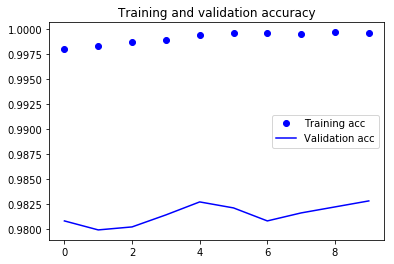

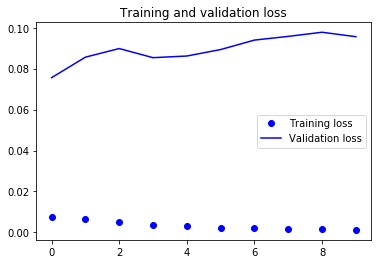

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [23]:
val_loss_min = val_loss.index(min(val_loss))
val_acc_max = val_acc.index(max(val_acc))
print('validation set min loss: ', val_loss_min)
print('validation set max accuracy: ', val_acc_max)

validation set min loss:  0
validation set max accuracy:  9


## 4.2 构建卷积神经网路

In [24]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [25]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                36928     
__________

### 4.2.1 训练模型(有验证集)

In [27]:
hintory = model.fit(train_images_conv, train_labels, epochs=5, batch_size=64, validation_data=(test_images_conv, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 12s 207us/step - loss: 0.1726 - acc: 0.9464 - val_loss: 0.0443 - val_acc: 0.9853
Epoch 2/5
60000/60000 [==============================] - 11s 181us/step - loss: 0.0461 - acc: 0.9859 - val_loss: 0.0382 - val_acc: 0.9861
Epoch 3/5
60000/60000 [==============================] - 11s 181us/step - loss: 0.0314 - acc: 0.9903 - val_loss: 0.0345 - val_acc: 0.9889
Epoch 4/5
60000/60000 [==============================] - 11s 181us/step - loss: 0.0244 - acc: 0.9924 - val_loss: 0.0347 - val_acc: 0.9898
Epoch 5/5
60000/60000 [==============================] - 11s 182us/step - loss: 0.0194 - acc: 0.9942 - val_loss: 0.0313 - val_acc: 0.9913


### 4.2.2 验证模型

In [28]:
test_loss, test_acc = model.evaluate(test_images_conv, test_labels)

10000/10000 [==============================] - 1s 101us/step


In [29]:
test_acc

0.9913

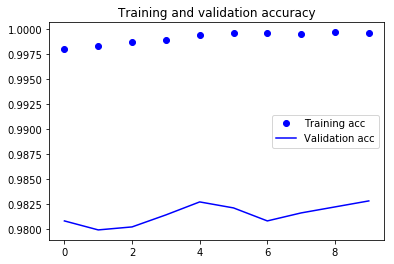

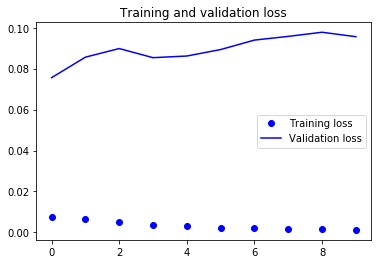

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [50]:
val_loss_min = val_loss.index(min(val_loss))
val_acc_max = val_acc.index(max(val_acc))
print('validation set min loss: ', val_loss_min)
print('validation set max accuracy: ', val_acc_max)

validation set min loss:  0
validation set max accuracy:  9


=====================================================================================

In [32]:
import itertools

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.datasets import mnist
import keras.backend as K

import matplotlib.pyplot as plt
from matplotlib.colors import colorConverter, ListedColormap

np.random.seed(1)
%matplotlib inline

In [33]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [34]:
X_train.shape

(60000, 28, 28)

In [35]:
# Flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [36]:
num_pixels

784

In [37]:
X_train.shape

(60000, 784)

In [38]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [39]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [40]:
# one-hot
num_classes = len(set(y_train))
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [41]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

### 全连接网络

In [42]:
model = Sequential()
model.add(Dense(num_pixels, input_dim = num_pixels, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

In [43]:
model.fit(X_train, y_train, 
          validation_data = (X_test, y_test), 
          epochs = 10, 
          batch_size = 128, 
          verbose = True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.2477 - acc: 0.9287 - val_loss: 0.1283 - val_acc: 0.9615
Epoch 2/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.0981 - acc: 0.9711 - val_loss: 0.0875 - val_acc: 0.9737
Epoch 3/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.0613 - acc: 0.9818 - val_loss: 0.0693 - val_acc: 0.9795
Epoch 4/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.0420 - acc: 0.9881 - val_loss: 0.0609 - val_acc: 0.9812
Epoch 5/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.0311 - acc: 0.9910 - val_loss: 0.0670 - val_acc: 0.9804
Epoch 6/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.0226 - acc: 0.9936 - val_loss: 0.0755 - val_acc: 0.9779
Epoch 7/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.0176 - acc: 0.9950 - val_loss: 0.0588 - val_acc

In [44]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


784*10再加上常数项是7850

### 卷积网络

In [45]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [46]:
X_train.shape

(60000, 28, 28, 1)

In [47]:
model = Sequential()
model.add(Conv2D(32, 3, input_shape = (28, 28, 1), activation = 'relu'))
model.add(Conv2D(32, 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(64, 3, activation = 'relu'))
model.add(Conv2D(64, 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [48]:
# Fit the model
model.fit(X_train, y_train, 
          validation_data=(X_test, y_test), 
          epochs = 10, 
          batch_size = 128)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100 - scores[1] * 100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 238us/step - loss: 0.1796 - acc: 0.9452 - val_loss: 0.0562 - val_acc: 0.9815
Epoch 2/10
60000/60000 [==============================] - 14s 225us/step - loss: 0.0469 - acc: 0.9856 - val_loss: 0.0353 - val_acc: 0.9892
Epoch 3/10
60000/60000 [==============================] - 14s 225us/step - loss: 0.0323 - acc: 0.9898 - val_loss: 0.0261 - val_acc: 0.9912
Epoch 4/10
60000/60000 [==============================] - 13s 225us/step - loss: 0.0245 - acc: 0.9921 - val_loss: 0.0246 - val_acc: 0.9914
Epoch 5/10
60000/60000 [==============================] - 14s 225us/step - loss: 0.0190 - acc: 0.9938 - val_loss: 0.0284 - val_acc: 0.9910
Epoch 6/10
60000/60000 [==============================] - 14s 225us/step - loss: 0.0155 - acc: 0.9952 - val_loss: 0.0281 - val_acc: 0.9909
Epoch 7/10
60000/60000 [==============================] - 14s 226us/step - loss: 0.0137 - acc: 0.9956 - val_loss: 0.

In [49]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
__________

卷积深度深，参数还少